In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Student_Performance.csv")

In [36]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [37]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [38]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [39]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [40]:
df.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == object:
        df[i] = le.fit_transform(df[i])

In [42]:
x =df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

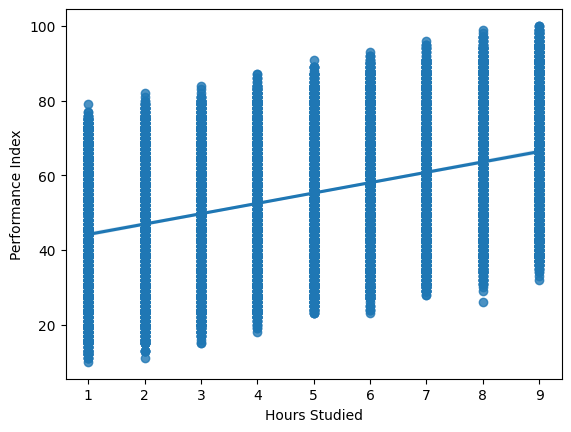

In [44]:
sns.regplot(x=df['Hours Studied'],y=y)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

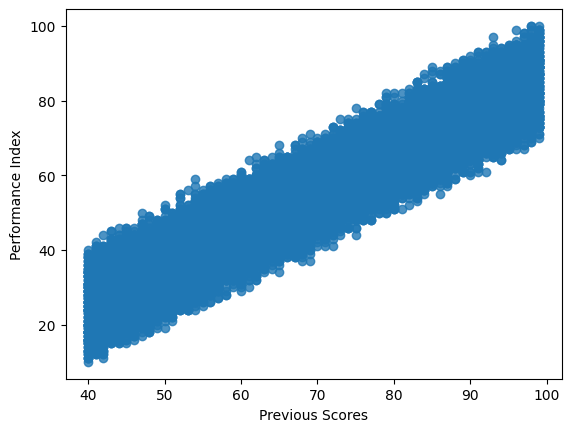

In [45]:
sns.regplot(x=df['Previous Scores'],y=y)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

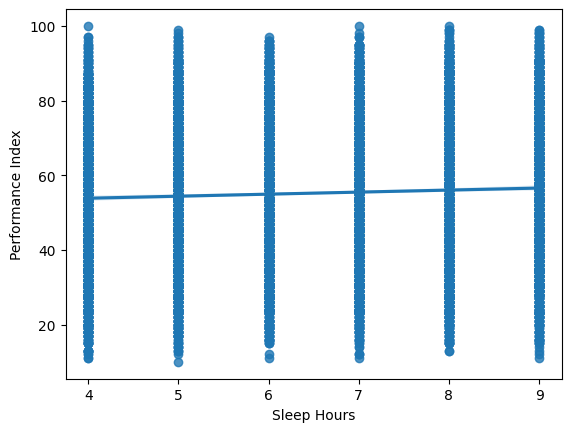

In [46]:
sns.regplot(x=df['Sleep Hours'],y=y)

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

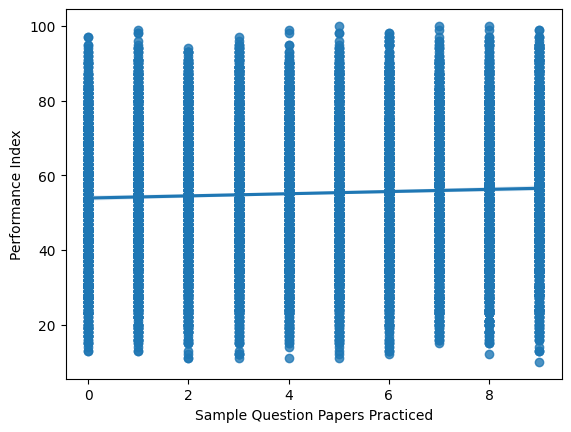

In [47]:
sns.regplot(x=df['Sample Question Papers Practiced'],y=y)

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = model.predict(x_test)

In [54]:
y_test.values

array([51., 20., 46., ..., 33., 69., 29.], shape=(3000,))

In [53]:
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077], shape=(3000,))

In [56]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)

In [57]:
print(f" Mean Absolute error {mae},\n Mean absolute percentage error {mape},\n Mean squared error {mse},\n Root mean squared error {rmse},\n r2 score {r2score}")

 Mean Absolute error 1.6090437564045217,
 Mean absolute percentage error 0.03504200252156806,
 Mean squared error 4.066563824092682,
 Root mean squared error 2.0165722957763457,
 r2 score 0.9890110607021136


In [ ]:
df2 = pd.DataFrame(
    {
        "Actual" : y_test,
        "Predicted" : y_pred,
        "Difference" : y_pred - y_test
    } 
)

In [60]:
df2

,Actual,Predicted,Difference
6252,51.0,54.747286,3.747286
4684,20.0,22.618844,2.618844
1731,46.0,47.936651,1.936651
4742,28.0,31.340099,3.340099
4521,41.0,43.059743,2.059743
...,...,...,...
8014,32.0,31.819775,-0.180225
1074,40.0,37.503045,-2.496955
3063,33.0,33.424518,0.424518
6487,69.0,67.925790,-1.074210
